In [44]:
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pickle
import dynchro

In [2]:
%load_ext autoreload
%autoreload 2

# 1. scatter plots: celltypes and pseudotime

In [4]:
adata = ad.read_h5ad("figures/wildtype_start.h5ad")
irf8 = ad.read_h5ad("figures/irf8_start.h5ad")
gfi1 = ad.read_h5ad("figures/gfi1_start.h5ad")
both = ad.read_h5ad("figures/both_start.h5ad")

In [ ]:
colors = ["#ffc800","#f6992d","#ed6a5a","#a75a5a","#60495a","#4c7680","#38a3a5","#7dba60","#c2d11b"]

In [11]:
def get_colors(colors, labels):
    color_map = {label: colors[i] for i, label in enumerate(np.unique(labels))}
    translated_colors = np.array([color_map[c] for c in labels])

    handles, labels = get_color_legend(color_map)

    return translated_colors, handles, labels

def get_color_legend(color_map):
    handles = [
        plt.Line2D(
                [0], [0], marker='o', markerfacecolor=c, color = "k", 
                markersize = 9, lw = 0
            ) for c in color_map.values()
        ]
    labels = list(color_map.keys())
    return handles, labels

In [18]:
def plot_celltypes(adata, ax):
    xs = adata.obsm['X_dr'][:, 0]
    ys = adata.obsm['X_dr'][:, 1]
    labels = adata.obs['label'].values

    translated_colors, handles, labels = get_colors(colors, labels)

    ax.scatter(xs, ys, c=translated_colors,  s=75, edgecolors = 'k')
    ax.set_title("Cell types")

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    # ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")
        
    ax.legend(handles=handles, labels=labels, title="Cell Types", loc='best', bbox_to_anchor=(1, 1), frameon=False)
    
    return ax

<Axes: title={'center': 'Cell types'}>

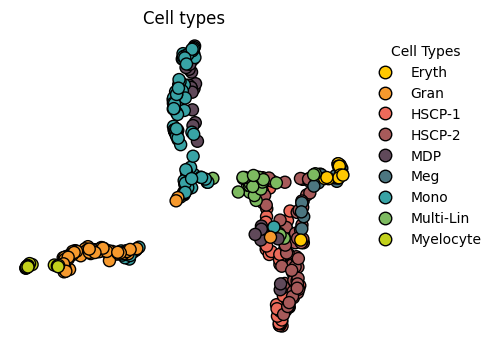

In [19]:
fig, ax = plt.subplots(figsize=(4.5, 4))
plot_celltypes(adata, ax)

<Axes: title={'center': 'Cell types'}>

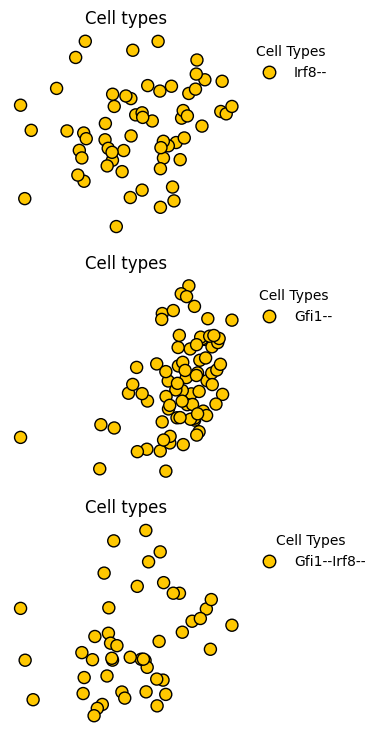

In [27]:
fig, ax = plt.subplots(nrows=3, figsize=(3, 9))
plot_celltypes(irf8, ax[0])
plot_celltypes(gfi1, ax[1])
plot_celltypes(both, ax[2])

In [36]:
def plot_pseudotime(adata, ax, title):

    xs = adata.obsm['X_dr'][:, 0]
    ys = adata.obsm['X_dr'][:, 1]
    colors = adata.obs['pseudotime'].values
    norm_colors = (colors - colors.min()) / (colors.max() - colors.min())

    blue_reversed = plt.get_cmap('Blues_r')

    ax.scatter(xs, ys, c=norm_colors, cmap=blue_reversed, s=100, edgecolors = 'k')

    ax.set_title(title)

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_xlabel("Flat tree plot")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_coords(0.25, 0.95)
    ax.set_ylabel("")
    plt.colorbar(ax.collections[0], label='Pseudotime', orientation='vertical', fraction=0.03, ticks = [0, 1], pad=0.02)

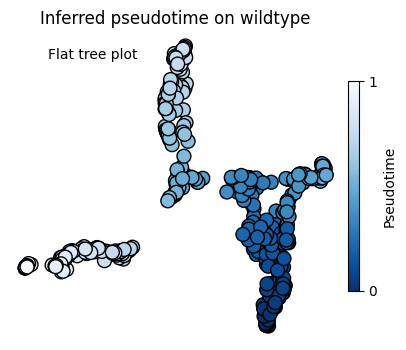

In [37]:
fig, ax = plt.subplots(figsize=(4.5, 4))
plot_pseudotime(adata, ax, "Inferred pseudotime on wildtype")

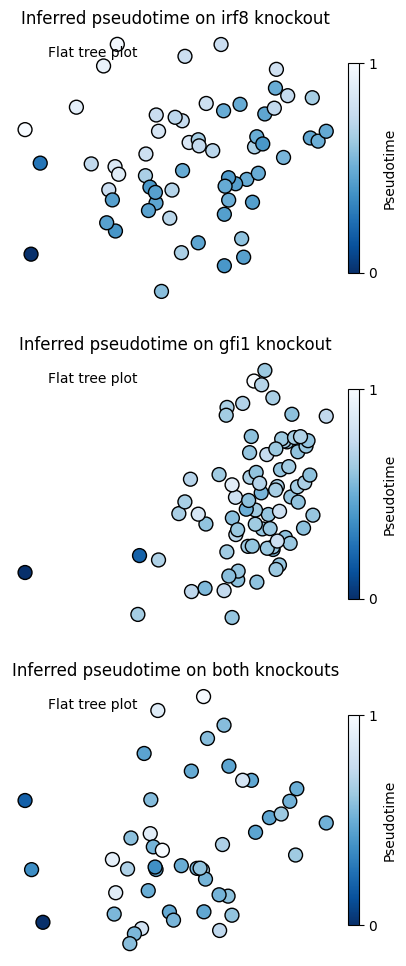

In [38]:
fig, ax = plt.subplots(nrows=3, figsize=(4.5, 12))
plot_pseudotime(irf8, ax[0], "Inferred pseudotime on irf8 knockout")
plot_pseudotime(gfi1, ax[1], "Inferred pseudotime on gfi1 knockout")
plot_pseudotime(both, ax[2], "Inferred pseudotime on both knockouts")

# 2. cost over pseudotime of alignments

## 2.1 individual plots

In [51]:
with open("figures/2_dynchro_warpings.pkl", "rb") as f:
    warpings = pickle.load(f)
    warping_irf8, warping_gfi1, warping_both = warpings

<Axes: title={'center': 'Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>

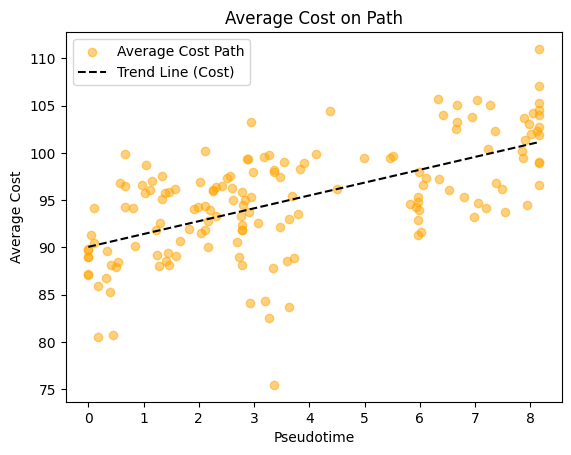

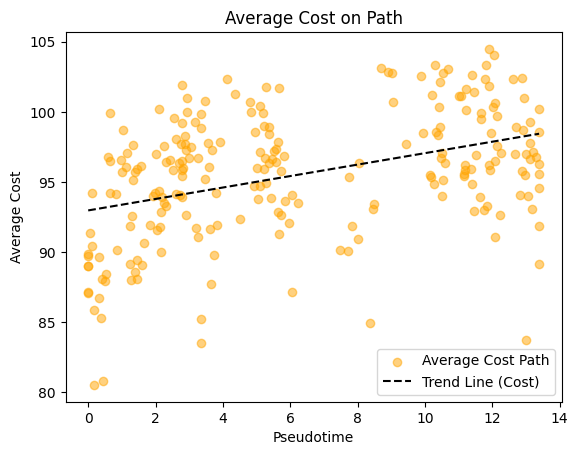

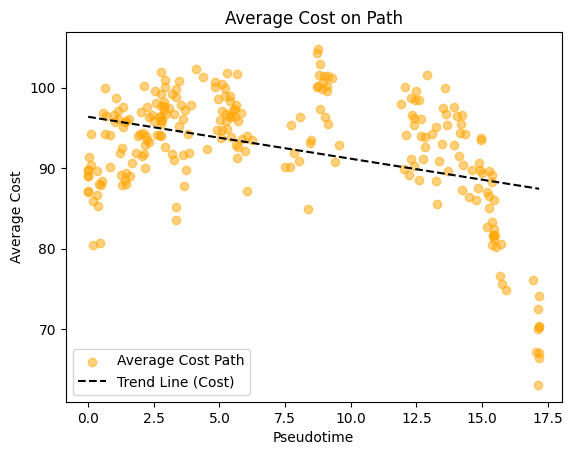

In [52]:
# plot warping of irf8 to granulocytic and monocytic lineages

#warping_irf8[3] --> has warpings for erythro, mono, gran
irf8_eryt = warping_irf8[3][0]
irf8_mono = warping_irf8[3][1]
irf8_gran = warping_irf8[3][2]

irf8_eryt = dynchro.tl.avg_cost_path(irf8_eryt, dtw_key="irf8_erythrocytic_irf8")
irf8_mono = dynchro.tl.avg_cost_path(irf8_mono, dtw_key="irf8_monocytic_irf8")
irf8_gran = dynchro.tl.avg_cost_path(irf8_gran, dtw_key="irf8_granulocytic_irf8")

dynchro.pl.plot_avg_cost_path(irf8_eryt, pseudotime_key="pseudotime", dtw_key="irf8_erythrocytic_irf8")
dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="pseudotime", dtw_key="irf8_monocytic_irf8")
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="pseudotime", dtw_key="irf8_granulocytic_irf8")

<Axes: title={'center': 'Average Cost on Path'}, xlabel='Pseudotime', ylabel='Average Cost'>

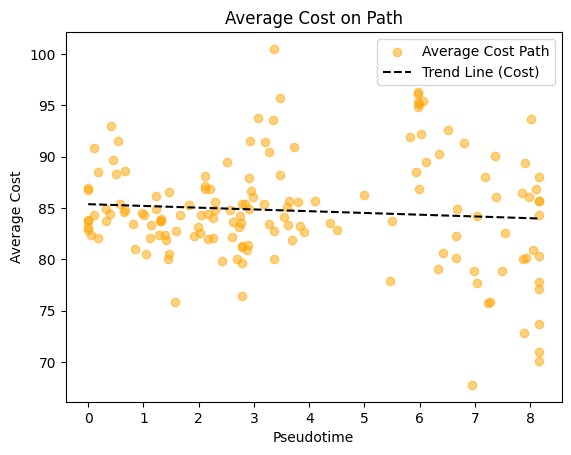

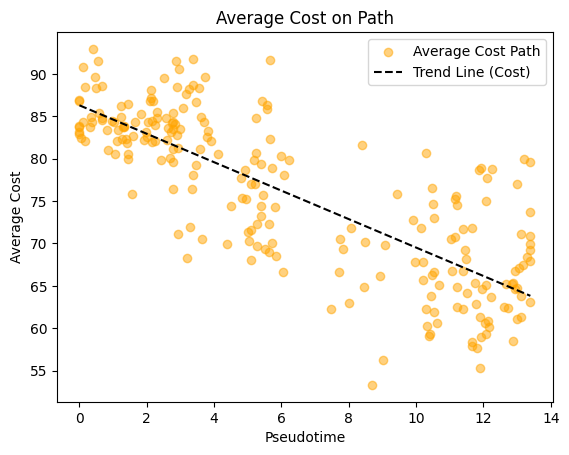

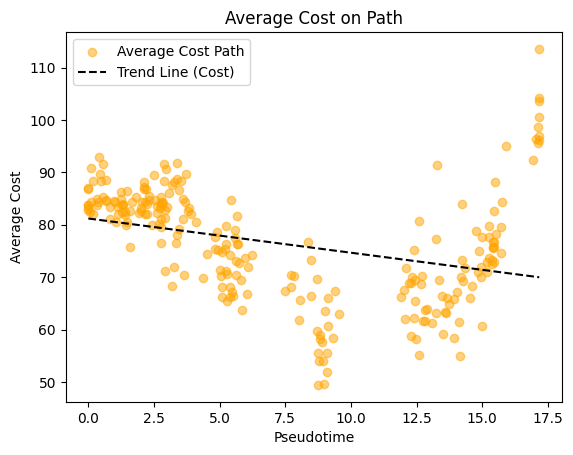

In [53]:
gfi1_eryt = warping_gfi1[3][0]
gfi1_mono = warping_gfi1[3][1]
gfi1_gran = warping_gfi1[3][2]

gfi1_eryt = dynchro.tl.avg_cost_path(gfi1_eryt, dtw_key="gfi1_erythrocytic_gfi1")
gfi1_mono = dynchro.tl.avg_cost_path(gfi1_mono, dtw_key="gfi1_monocytic_gfi1")
gfi1_gran = dynchro.tl.avg_cost_path(gfi1_gran, dtw_key="gfi1_granulocytic_gfi1")

dynchro.pl.plot_avg_cost_path(gfi1_eryt, pseudotime_key="pseudotime", dtw_key="gfi1_erythrocytic_gfi1")
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="pseudotime", dtw_key="gfi1_monocytic_gfi1")
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="pseudotime", dtw_key="gfi1_granulocytic_gfi1")

## 2.1 2x2 plot

In [73]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

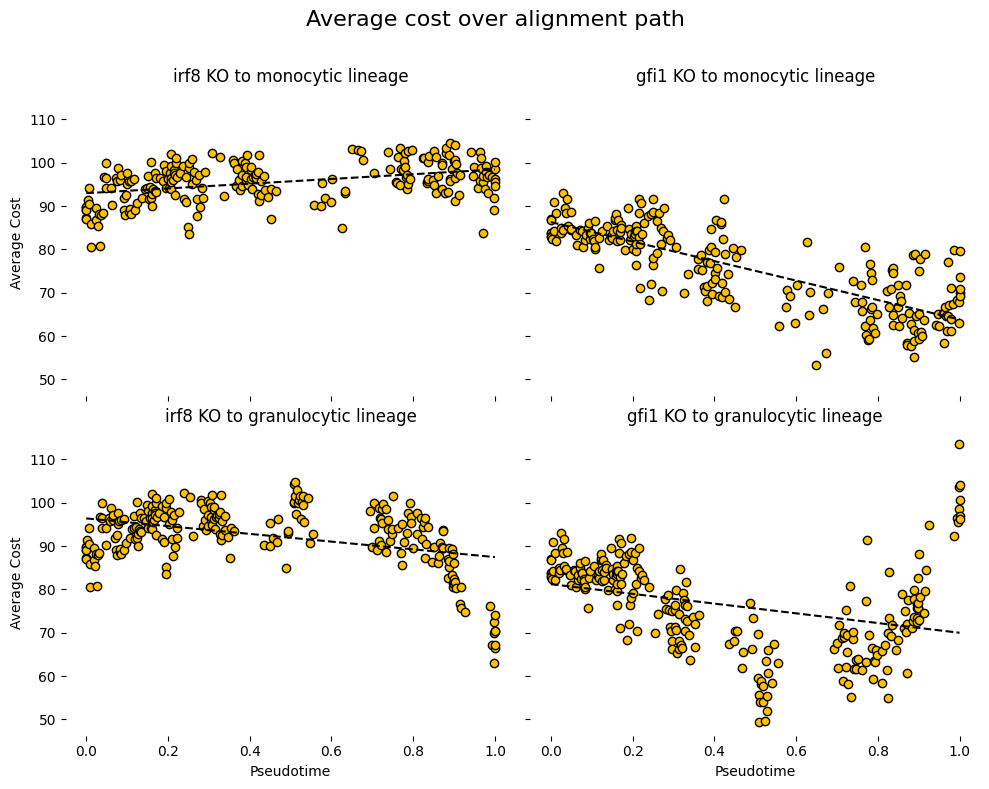

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True, sharex=True)

irf8_mono.obs["norm_pseudotime"] = norm(irf8_mono.obs["pseudotime"])
irf8_gran.obs["norm_pseudotime"] = norm(irf8_gran.obs["pseudotime"])
gfi1_mono.obs["norm_pseudotime"] = norm(gfi1_mono.obs["pseudotime"])
gfi1_gran.obs["norm_pseudotime"] = norm(gfi1_gran.obs["pseudotime"])

# irf8_mono.obs["norm_pseudotime"] = (irf8_mono.obs["pseudotime"] - irf8_mono.obs["pseudotime"].min()) / (irf8_mono.obs["pseudotime"].max() - irf8_mono.obs["pseudotime"].min())
# irf8_gran.obs["norm_pseudotime"] = (irf8_gran.obs["pseudotime"] - irf8_gran.obs["pseudotime"].min()) / (irf8_gran.obs["pseudotime"].max() - irf8_gran.obs["pseudotime"].min())
# gfi1_mono.obs["norm_pseudotime"] = (gfi1_mono.obs["pseudotime"] - gfi1_mono.obs["pseudotime"].min()) / (gfi1_mono.obs["pseudotime"].max() - gfi1_mono.obs["

dynchro.pl.plot_avg_cost_path(irf8_mono, pseudotime_key="norm_pseudotime", dtw_key="irf8_monocytic_irf8", ax=axs[0,0])
dynchro.pl.plot_avg_cost_path(irf8_gran, pseudotime_key="norm_pseudotime", dtw_key="irf8_granulocytic_irf8", ax=axs[1,0])
dynchro.pl.plot_avg_cost_path(gfi1_mono, pseudotime_key="norm_pseudotime", dtw_key="gfi1_monocytic_gfi1", ax=axs[0,1])
dynchro.pl.plot_avg_cost_path(gfi1_gran, pseudotime_key="norm_pseudotime", dtw_key="gfi1_granulocytic_gfi1", ax=axs[1,1])

axs[0, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[0, 1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[1, 0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[1, 1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)

axs[0,0].get_legend().remove()
axs[0,1].get_legend().remove()
axs[1,0].get_legend().remove()
axs[1,1].get_legend().remove()

axs[0, 0].set_title("irf8 KO to monocytic lineage")
axs[1, 0].set_title("irf8 KO to granulocytic lineage")
axs[0, 1].set_title("gfi1 KO to monocytic lineage")
axs[1, 1].set_title("gfi1 KO to granulocytic lineage")

axs[0, 0].xaxis.label.set_visible(False)
axs[0, 1].xaxis.label.set_visible(False)
axs[0, 1].yaxis.label.set_visible(False)
axs[1, 1].yaxis.label.set_visible(False)

fig.tight_layout()
fig.suptitle("Average cost over alignment path", fontsize=16)
fig.subplots_adjust(top=0.88)